# GROUP 2 - PORTFOLIO 3

# Movement classification from elderly people charade games

Tamara Bergerhoff, Alexander Prisak, Dhruval Bhuva, Vishwa Rajput, Siva Sai Kumar Reddy Kachana, Gurudeep Haleangadi Nagesh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import csv
import warnings

In [2]:
from sklearn.model_selection import train_test_split
#from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.exceptions import ConvergenceWarning
from sklearn.kernel_approximation import Nystroem

## Exercise1: Data set

Create a data set import script
- Load the time series movement sequence data set in the .csv format. The sequences
are time recordings of movements (joint angles) with different lengths. Labels are
given in the file names.
- Try to visualize the data to get a first idea

In [3]:

#install kaggle module
! pip install -q kaggle
! mkdir ~/.kaggle
! cp "/Users/alex/Documents/Learning of Structured Data/portfolio_3/kaggle.json" ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


mkdir: /Users/alex/.kaggle: File exists


In [4]:

#download the dataset to Google Drive
!cd "/Users/alex/Documents/Learning of Structured Data/portfolio_3"
!kaggle competitions download -c learning-of-structured-data-fhws-ws2324

learning-of-structured-data-fhws-ws2324.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:

#unzip the files
! mkdir portfolio3_data
! unzip {"learning-of-structured-data-fhws-ws2324.zip"} -d portfolio3_data


mkdir: portfolio3_data: File exists


Archive:  learning-of-structured-data-fhws-ws2324.zip
replace portfolio3_data/test/test/0.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


Take all test files and put them in a dataframe. Only the first 75 columns are kept, due to some files that do not have all columns

In [3]:
# take all test files and put them in a dataframe
PATH_TO_TEST = "/Users/alex/Documents/Learning of Structured Data/portfolio_3/portfolio3_data/test/test"
files = [ffile for ffile in os.listdir(PATH_TO_TEST)]

test_data=pd.DataFrame()

for file in files:
    df = pd.read_csv(os.path.join(PATH_TO_TEST, file), header=None, usecols=list(range(75)))
    # add a column in the dataframe containing the id of a file as integer
    df["id"] = int(file[:file.find(".")])
    test_data = pd.concat ([test_data, df])

In [4]:
# check if all ids are correct in the dataset
files_int = [int(id[:id.find(".")]) for id in files]
files_int.sort()
len(files_int)

305

In [5]:
#show the test dataframe
test_data = test_data.reset_index(drop = True)
test_data

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,id
0,317.964783,68.780891,0.843441,324.006256,169.364471,0.796325,245.632797,167.362991,0.782827,199.397888,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,223
1,318.000000,69.000000,1.000000,324.000000,170.000000,1.000000,246.000000,167.000000,1.000000,201.000000,...,-1.584007,0.971222,0.0,-1.584007,0.971222,0.0,-1.584007,0.971222,0.0,223
2,318.000000,69.000000,1.000000,324.000000,170.000000,1.000000,246.000000,167.000000,1.000000,200.000000,...,-1.889153,0.668274,0.0,-1.889153,0.668274,0.0,-1.889153,0.668274,0.0,223
3,318.000000,69.000000,1.000000,324.000000,170.000000,1.000000,246.000000,167.000000,1.000000,200.000000,...,-3.869377,2.886604,0.0,-3.869377,2.886604,0.0,-3.869377,2.886604,0.0,223
4,318.000000,69.000000,1.000000,324.000000,170.000000,1.000000,246.000000,167.000000,1.000000,198.000000,...,-3.869377,2.886604,0.0,-3.869377,2.886604,0.0,-3.869377,2.886604,0.0,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207303,325.000000,68.000000,1.000000,319.000000,166.000000,1.000000,244.000000,169.000000,1.000000,199.000000,...,-22.634995,-15.135086,0.0,-22.634995,-15.135086,0.0,-22.634995,-15.135086,0.0,206
207304,325.000000,68.000000,1.000000,319.000000,166.000000,1.000000,244.000000,169.000000,1.000000,199.000000,...,-21.465622,-14.051544,0.0,-21.465622,-14.051544,0.0,-21.465622,-14.051544,0.0,206
207305,325.000000,67.000000,1.000000,319.000000,166.000000,1.000000,244.000000,169.000000,1.000000,199.000000,...,-21.106339,-13.491394,0.0,-21.106339,-13.491394,0.0,-21.106339,-13.491394,0.0,206
207306,325.000000,67.000000,1.000000,319.000000,166.000000,1.000000,241.000000,168.000000,1.000000,200.000000,...,-20.653397,-12.696106,0.0,-20.653397,-12.696106,0.0,-20.653397,-12.696106,0.0,206


The same is done for the train data, but with an additional column "label" for each row. Also, column "id" is kept as in the test data.

In [7]:
# The same is done for the train data, but with an additional column "label" for each
PATH_TO_TRAIN = "/Users/alex/Documents/Learning of Structured Data/portfolio_3/portfolio3_data/train/train"

files_train = [ffile for ffile in os.listdir(PATH_TO_TRAIN)]
# Display the first 10 files of that directory
files_train[:10]

['25790362_rowing.csv',
 '85319549_drums.csv',
 '97023926_rowing.csv',
 '50028294_boxing.csv',
 '27883012_violin.csv',
 '99871116_guitar.csv',
 '80207182_guitar.csv',
 '27679446_drums.csv',
 '29541355_violin.csv',
 '42753893_boxing.csv']

In [8]:
# check how many files in the train and test dataset have only 75 columns, instead of 79

def check_75(afiles, path):
  counter = 0
  list_75 = []

  for ffile in afiles:
    with open(os.path.join(path, ffile)) as csv_file:
      reader = csv.reader(csv_file)
      ncol = len(next(reader))
      ncol = len(next(reader))
    #df = pd.read_csv(os.path.join(path, ffile), header=None)
      if ncol == 75:
        counter += 1
        list_75.append(ffile)

  print("{} has {} number of files with 75 columns out of {}".format(path[-6:], counter, len(afiles)))
  #return counter, list_75

check_75(files, PATH_TO_TEST)
check_75(files_train, PATH_TO_TRAIN)

"""
This concludes that all files have the initial format of only 75 columns and there could be data in other lines which is longer.
Therefore, it should be skipped and only 75 columns left.
"""

t/test has 305 number of files with 75 columns out of 305
/train has 1167 number of files with 75 columns out of 1167


'\nThis concludes that all files have the initial format of only 75 columns and there could be data in other lines which is longer.\nTherefore, it should be skipped and only 75 columns left.\n'

In [9]:
# create a dictionary to store the labels
labels_dict = {
    "boxing" : 0,
    "drums"  : 1,
    "guitar" : 2,
    "rowing" : 3,
    "violin" : 4
}

# and an inverse one
inv_labels_dict = {v:k for k,v in labels_dict.items()}

#dictionary for transforming features into strings
features_dict = {
    "IDX_NOSE"        : 0,
    "IDX_NECK"        : 3,
    "IDX_R_SHOULDER"  : 6,
    "IDX_R_ELBOW"     : 9,
    "IDX_R_WRIST"     : 12,
    "IDX_L_SHOULDER"  : 15,
    "IDX_L_ELBOW"     : 18,
    "IDX_L_WRIST"     : 21,
    "IDX_M_HIP"       : 24,
    "IDX_R_HIP"       : 27,
    "IDX_R_KNEE"      : 30,
    "IDX_R_ANKLE"     : 33,
    "IDX_L_HIP"       : 36,
    "IDX_L_KNEE"      : 39,
    "IDX_L_ANKLE"     : 42,
    "IDX_R_EYE"       : 45,
    "IDX_L_EYE"       : 48,
    "IDX_R_EAR"       : 51,
    "IDX_L_EAR"       : 54,
    "IDX_L_BIG_TOE"   : 57,
    "IDX_L_SMALL_TOE" : 60,
    "IDX_L_HEEL"      : 63,
    "IDX_R_BIG_TOE"   : 66,
    "IDX_R_SMALL_TOE" : 69,
    "IDX_R_HEEL"      : 72,
    "IDX_R_ANGLE_ELBOW" : 75,
    "IDX_R_ANGLE_ARMPIT" : 76,
    "IDX_L_ANGLE_ELBOW" : 77,
    "IDX_L_ANGLE_ARMPIT" : 78,
}

inv_features_dict = {v:k for k,v in features_dict.items()}

In [10]:
train_data = pd.DataFrame()

for ffile in files_train:
    df = pd.read_csv(os.path.join(PATH_TO_TRAIN, ffile), header=None, usecols=list(range(75)))
    # add a column in the dataframe containing the id of a file as integer
    df["id"] = int(ffile[:ffile.find("_")])
    # add a column in the dataframe containing the label of a file
    df["label"] = labels_dict[ ffile[ffile.find("_") + 1 : ffile.find(".")] ]
    train_data = pd.concat([train_data, df])

In [11]:
# show the train dataframe
train_data = train_data.reset_index(drop = True)
train_data

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,id,label
0,281.896088,143.142471,0.894997,295.892914,213.444427,0.900365,237.631271,213.499359,0.815841,217.5289,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,25790362,3
1,282.000000,143.000000,1.000000,296.000000,214.000000,1.000000,237.000000,214.000000,1.000000,216.0000,...,0.375322,0.0,0.012544,0.375322,0.0,0.012544,0.375322,0.0,25790362,3
2,282.000000,143.000000,1.000000,296.000000,214.000000,1.000000,237.000000,214.000000,1.000000,215.0000,...,1.156013,0.0,0.294774,1.156013,0.0,0.294774,1.156013,0.0,25790362,3
3,282.000000,143.000000,1.000000,296.000000,214.000000,1.000000,237.000000,214.000000,1.000000,214.0000,...,1.454240,0.0,0.340671,1.454240,0.0,0.340671,1.454240,0.0,25790362,3
4,282.000000,143.000000,1.000000,296.000000,214.000000,1.000000,237.000000,214.000000,1.000000,212.0000,...,1.486564,0.0,0.324183,1.486564,0.0,0.324183,1.486564,0.0,25790362,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653417,310.000000,113.000000,1.000000,316.000000,202.000000,1.000000,247.000000,203.000000,1.000000,221.0000,...,0.244774,0.0,-44.395828,0.244774,0.0,-44.395828,0.244774,0.0,33264652,3
653418,311.000000,113.000000,1.000000,315.000000,202.000000,1.000000,248.000000,203.000000,1.000000,222.0000,...,0.337257,0.0,-44.888077,0.337257,0.0,-44.888077,0.337257,0.0,33264652,3
653419,312.000000,113.000000,1.000000,315.000000,202.000000,1.000000,249.000000,203.000000,1.000000,223.0000,...,0.358620,0.0,-46.054199,0.358620,0.0,-46.054199,0.358620,0.0,33264652,3
653420,313.000000,113.000000,1.000000,315.000000,202.000000,1.000000,249.000000,203.000000,1.000000,224.0000,...,0.430214,0.0,-45.458847,0.430214,0.0,-45.458847,0.430214,0.0,33264652,3


There are also not in every file 79 columns. Therefore, only the first 75 will be considered

Let's look over all classes to some metrics

In [12]:
def describe_df(df, inv_dict_with_labels, full_describe=False, std_treshold = 0.2):
  array_low_std = []

  def check_cols_low_std(df_2):
    # Check how many columns have a std lower than a treshold
    print("Column numbers that have std lower than {}".format(std_treshold), end = " ")
    columns_low_std = (df_2.std() < std_treshold)
    print(" are {} in total".format(columns_low_std.sum()))
    ans = list(columns_low_std[columns_low_std == True].index)[:-1]
    print(ans, "\n")

    # Check for columns that have the same 25%, 50% and 75% of data.
    columns_eq_25_50_75 = ((df_2.quantile(0.25) == df_2.quantile(0.5)) & (df_2.quantile(0.25) == df_2.quantile(0.75)))
    columns_eq_idx = list(columns_eq_25_50_75[columns_eq_25_50_75 == True].index)[:-1]
    print("Columns that have the same 25%, 50% and 75% quantile are {}: \n{} \n".format(columns_eq_25_50_75.sum(), columns_eq_idx))


    return ans, columns_eq_idx

  for i in range(4):
    print("-" * 20)
    print("For {}".format(inv_dict_with_labels[i]))
    if full_describe:
      print(df[df["label"] == i].describe())

    # Check how many values are in every class
    print("There are {} values in this class.".format(df[df["label"] == i][0].count()))

    low_std_columns = check_cols_low_std(df[df["label"] == i])[0] #idx 0 stores the low std columns
    array_low_std.append(low_std_columns)


  print("-" * 30)
  print("For the whole dataframe")
  array_low_std_global, array_low_quantile_global = check_cols_low_std(df) # idx 1 stores the low quantile columns

  #Find all common columns between low quantile and low std arrays
  # check first the common columns between global low std and global low quantile
  intersection_array = np.intersect1d(array_low_std_global, array_low_quantile_global)
  # then calculate the intersection array for every std_array from each category
  for array in array_low_std:
    intersectin_array = np.intersect1d(intersection_array, array)

  return intersection_array


In [13]:
columns_to_be_deleted = describe_df(train_data, inv_labels_dict, full_describe=False, std_treshold=1)
print("Final intersection array with {} columns to be deleted: \n{}".format(len(columns_to_be_deleted), columns_to_be_deleted))
"""
Looking at the output of the code, the data is almost evenly distributed accross classes.
"""

--------------------
For boxing
There are 126106 values in this class.
Column numbers that have std lower than 1  are 26 in total
[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 59, 62, 65, 68, 71, 74] 

Columns that have the same 25%, 50% and 75% quantile are 24: 
[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 35, 38, 44, 47, 50, 53, 56, 59, 62, 65, 68, 71, 74] 

--------------------
For drums
There are 128246 values in this class.
Column numbers that have std lower than 1  are 26 in total
[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 59, 62, 65, 68, 71, 74] 

Columns that have the same 25%, 50% and 75% quantile are 24: 
[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 35, 38, 44, 47, 50, 53, 56, 59, 62, 65, 68, 71, 74] 

--------------------
For guitar
There are 119100 values in this class.
Column numbers that have std lower than 1  are 26 in total
[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 59, 62, 65, 68, 71, 74] 

Col

'\nLooking at the output of the code, the data is almost evenly distributed accross classes.\n'

There are many columns that are the same (globally and for every label) in terms of quantiles and have low standard deviation. Thus, it is possible to leave the out.

In [14]:
# delete the unnecessary columns from the train and test dataframes
train_data = train_data.drop(columns = columns_to_be_deleted)
test_data = test_data.drop(columns = columns_to_be_deleted)

In [15]:
train_data

,0,1,3,4,6,7,9,10,12,13,...,64,66,67,69,70,72,73,74,id,label
0,281.896088,143.142471,295.892914,213.444427,237.631271,213.499359,217.5289,301.926331,217.457687,394.385468,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,25790362,3
1,282.000000,143.000000,296.000000,214.000000,237.000000,214.000000,216.0000,301.000000,217.000000,393.000000,...,0.375322,0.012544,0.375322,0.012544,0.375322,0.012544,0.375322,0.0,25790362,3
2,282.000000,143.000000,296.000000,214.000000,237.000000,214.000000,215.0000,301.000000,217.000000,389.000000,...,1.156013,0.294774,1.156013,0.294774,1.156013,0.294774,1.156013,0.0,25790362,3
3,282.000000,143.000000,296.000000,214.000000,237.000000,214.000000,214.0000,299.000000,217.000000,387.000000,...,1.454240,0.340671,1.454240,0.340671,1.454240,0.340671,1.454240,0.0,25790362,3
4,282.000000,143.000000,296.000000,214.000000,237.000000,214.000000,212.0000,298.000000,217.000000,380.000000,...,1.486564,0.324183,1.486564,0.324183,1.486564,0.324183,1.486564,0.0,25790362,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653417,310.000000,113.000000,316.000000,202.000000,247.000000,203.000000,221.0000,310.000000,205.000000,404.000000,...,0.244774,-44.395828,0.244774,-44.395828,0.244774,-44.395828,0.244774,0.0,33264652,3
653418,311.000000,113.000000,315.000000,202.000000,248.000000,203.000000,222.0000,310.000000,205.000000,410.000000,...,0.337257,-44.888077,0.337257,-44.888077,0.337257,-44.888077,0.337257,0.0,33264652,3
653419,312.000000,113.000000,315.000000,202.000000,249.000000,203.000000,223.0000,310.000000,205.000000,415.000000,...,0.358620,-46.054199,0.358620,-46.054199,0.358620,-46.054199,0.358620,0.0,33264652,3
653420,313.000000,113.000000,315.000000,202.000000,249.000000,203.000000,224.0000,310.000000,206.000000,418.000000,...,0.430214,-45.458847,0.430214,-45.458847,0.430214,-45.458847,0.430214,0.0,33264652,3


(Note: Exercise 1 is left out in the html version of the notebook for not being repetitive for every model. This is for the visualization purposes. The full code can be found in the .ipynb file.)

## Exercise2: Embedding and Modeling

In the lecture we have discussed some techniques to handle temporal data / time series
data.
- Select a technique how to represent / process the given data - this could be an explicit or implicit data representation or also a simple statistic like histograms, bit-encodings or alike
- Process the data to obtain a meaning and powerful representation
- Create a process to obtain a classification or clustering model for the given data. This should include meta parameter optimization.
- Provide a brief explanation of the algorithm-design you used

In [16]:
# Divide the traub data into train and test ones and rescale the data
robust_scaler = RobustScaler()

X = train_data.drop(columns = ["id", "label"])
X_scaled = robust_scaler.fit_transform(X)
y = train_data["label"]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [ ]:
# Here are some classifiers that are checked with cross-validation
algorithms = {
    "RandomForest": RandomForestClassifier(),
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
}

In [ ]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

for key, classifier in algorithms.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", key, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

#Runtime of this cell: 2h 30m

Copy of the output from previous cell:

Classifiers:  RandomForest Has a training score of 100.0 % accuracy score

Classifiers:  LogisiticRegression Has a training score of 79.0 % accuracy score

Classifiers:  KNearest Has a training score of 100.0 % accuracy score

---

According to the result from above, Random Forest Classifier (also KNN has the same score) is the most suitable one. The next step is to find the best parameters with GridSearchCV. In addition, it shows that the models are clearly over-fitting the train data. Therefore, it is necessary to put some restrictions for the parameters of the RandomForestClassifier, such as: maximum depth and minimum samples for splitting.

In [30]:
random_forest_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [6,7,8],
    'criterion' :['entropy'],
    'min_samples_split' : [5, 10],
}

In [32]:
CV_rfc = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid, cv = 3, verbose = 2, n_jobs=-1)
CV_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=5, n_estimators=200; total time= 5.0min
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=10, n_estimators=200; total time= 5.0min
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=5, n_estimators=200; total time= 5.0min
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=10, n_estimators=200; total time= 5.0min
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=5, n_estimators=200; total time= 5.1min
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_split=5, n_estimators=200; total time= 3.5min
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=10, n_estimators=200; total time= 4.7min
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_split=5, n_estimators=200; total time=

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [5, 10],
                         'n_estimators': [200, 500]},
             verbose=2)

Below are the best parameters with 3-fold cross-validation:

In [33]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_split': 10,
 'n_estimators': 200}

Now it is possible to train the RandomForestClassifier with the best parameters.

In [16]:
rfc = RandomForestClassifier(
    criterion="entropy",
    max_depth=8,
    max_features="log2",
    min_samples_split=10,
    n_estimators=200,
    n_jobs=-1,
    verbose=1
)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   44.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s


Accuracy 0.9013811837624823


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.4s finished


The classification report of the RandomForestClassifier:

In [17]:
# Here is the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     25288
           1       0.77      0.97      0.86     25563
           2       0.89      0.93      0.91     23766
           3       0.97      0.90      0.93     29068
           4       0.96      0.89      0.93     27000

    accuracy                           0.90    130685
   macro avg       0.91      0.90      0.90    130685
weighted avg       0.91      0.90      0.90    130685



The confusion matrix of the model:

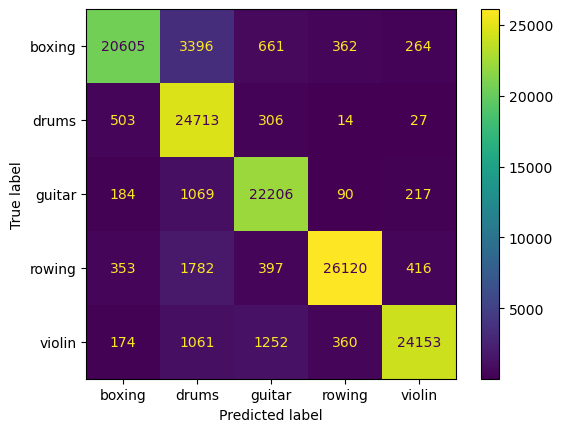

In [18]:
labels = ['boxing', 'drums', 'guitar', 'rowing', 'violin']

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.show()

### Getting the test data in the right format with prediction for Kaggle competition

In [19]:
id_col = test_data["id"]
X_kaggle = test_data.drop(columns=["id"])
# Rescale the data with RobustScaler
X_kaggle_scaled = robust_scaler.transform(X_kaggle)
print("Shape of the test data", X_kaggle_scaled.shape)

Shape of the test data (207308, 51)


In [20]:
#fit the data into the RandomForestClassifier (without parameter optimization)
y_kaggle_predict = rfc.predict(X_kaggle_scaled)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.5s finished


In [22]:
# Add it back to a dataframe with id column
def transform_to_kaggle(kaggle_prediction, id_column, path_to_save_csv):
  kaggle_df = pd.DataFrame({
      "id": id_col.astype(int),
      "action": y_kaggle_predict
  })

  kaggle_df = kaggle_df.sort_values("id")
  kaggle_df = kaggle_df.groupby(["id"])['action'].apply(lambda x: x.value_counts().idxmax()).reset_index()
  kaggle_df.to_csv(path_to_save_csv + "/" + "rfc_v1.csv", index = False, sep=",")

  return kaggle_df

path_to_save = "/Users/alex/Documents/Learning of Structured Data/portfolio_3"
final_df = transform_to_kaggle(y_kaggle_predict, id_col, path_to_save)

final_df

,id,action
0,0,0
1,1,3
2,2,4
3,3,0
4,4,4
...,...,...
300,300,0
301,301,0
302,302,4
303,303,2


In [23]:
final_df.groupby(["id"])['action'].apply(lambda x: x.value_counts()).reset_index()

,id,level_1,action
0,0,0,1
1,1,3,1
2,2,4,1
3,3,0,1
4,4,4,1
...,...,...,...
300,300,0,1
301,301,0,1
302,302,4,1
303,303,2,1


## Exercise3: Evaluation
- Estimate theoretical and practical the memory and runtime complexity of your
approach - make a distinction between training and test. Address also the sparsity of your model.
- Evaluate the resulting model by appropriate evaluation measures (cross-
validation,AUC,NMI or alike)

### Theoretical Complexity of Runtime: 
Define:
- $N$: number of samples in the training set
- $M$: number of features in the training set
- $T$: number of trees in the forest

Training and testing complexities:
- Model Training: $\mathcal{O}(T \cdot N \cdot M \cdot \log N)$
- Model Testing: $\mathcal{O}(T \cdot \log N)$ 

---

### Theoretical Complexity of Memory: 
- $\mathcal{O}(T \cdot N \cdot M)$ for storing the entire Random Forest in the memory

---

### With 3-fold Cross-Validation:
- Model Training: $\mathcal{O}(3 \cdot T \cdot N \cdot M \cdot \log N)$

---

### Memory and time used for training RandomForestClassifier
without parallel jobs 

In [17]:
import tracemalloc
import time

sample_list = list(range(10_000, 130_000, 20_000))
ex_time_list = []
mem_time_list = []

def calc_memory_and_time(func):
    def wrapper_func(*args, **kwargs):
        global ex_time_list
        global mem_time_list
        tracemalloc.start()

        start1 = time.time()
        func(*args, **kwargs)
        end1 = time.time()

        mem = tracemalloc.get_traced_memory()

        tracemalloc.stop()

        print("Current memory usage for {} is {} MB; Peak was {} MB".format(func.__name__, mem[0] / 10 ** 6, mem[1] / 10 ** 6))
        print("Total time needed for {} is {} seconds".format(func.__name__, end1 - start1))

        ex_time_list.append(end1 - start1)
        mem_time_list.append(mem[1] / 10 ** 6)

    return wrapper_func


@calc_memory_and_time
def train(rfc_l, size):
    rfc_l.fit(X_train[:size], y_train[:size])

@calc_memory_and_time
def predict(rfc_l, size):
    y_pred = rfc_l.predict(X_test[:size])


def plot_mem_time():
    ex_time_train = []
    ex_time_predict = []
    mem_train = []
    mem_predict = []
    global ex_time_list, mem_time_list

    for size in sample_list:
        print("\n\nFor sample size {}".format(size))
        rfc = RandomForestClassifier(
            criterion="entropy",
            max_depth=8,
            max_features="log2",
            min_samples_split=10,
            n_estimators=200,
            #n_jobs=-1,
            verbose=0
        )

        train(rfc, size)
        predict(rfc, size)
    
    ex_time_train = ex_time_list[::2]
    ex_time_predict = ex_time_list[1::2]
    mem_train = mem_time_list[::2]
    mem_predict = mem_time_list[1::2]
    
    plt.figure(figsize=(10, 5))
    plt.plot(sample_list, ex_time_train, label="Training time")
    plt.plot(sample_list, ex_time_predict, label="Prediction time")
    plt.xlabel("Sample size")
    plt.ylabel("Time (s)")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(sample_list, mem_train, label="Training memory")
    plt.plot(sample_list, mem_predict, label="Prediction memory")
    plt.xlabel("Sample size")
    plt.ylabel("Memory (MB)")
    plt.legend()
    plt.show()




For sample size 10000
Current memory usage for train is 0.272566 MB; Peak was 3.251244 MB
Total time needed for train is 4.238560914993286 seconds
Current memory usage for predict is 0.007122 MB; Peak was 3.033074 MB
Total time needed for predict is 0.14061284065246582 seconds


For sample size 30000
Current memory usage for train is 0.25717 MB; Peak was 9.092346 MB
Total time needed for train is 11.319912195205688 seconds
Current memory usage for predict is 0.007242 MB; Peak was 8.873194 MB
Total time needed for predict is 0.40196704864501953 seconds


For sample size 50000
Current memory usage for train is 0.257219 MB; Peak was 14.952454 MB
Total time needed for train is 16.79272198677063 seconds
Current memory usage for predict is 0.007178 MB; Peak was 14.71313 MB
Total time needed for predict is 0.6197030544281006 seconds


For sample size 70000
Current memory usage for train is 0.256122 MB; Peak was 20.811298 MB
Total time needed for train is 23.6999831199646 seconds
Current mem

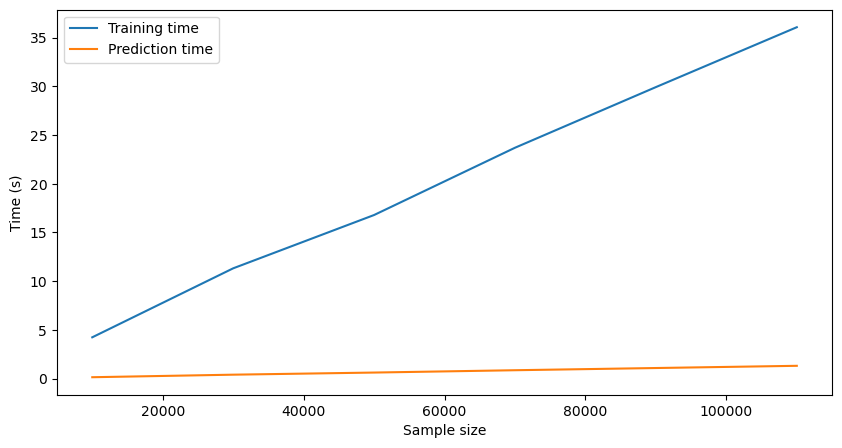

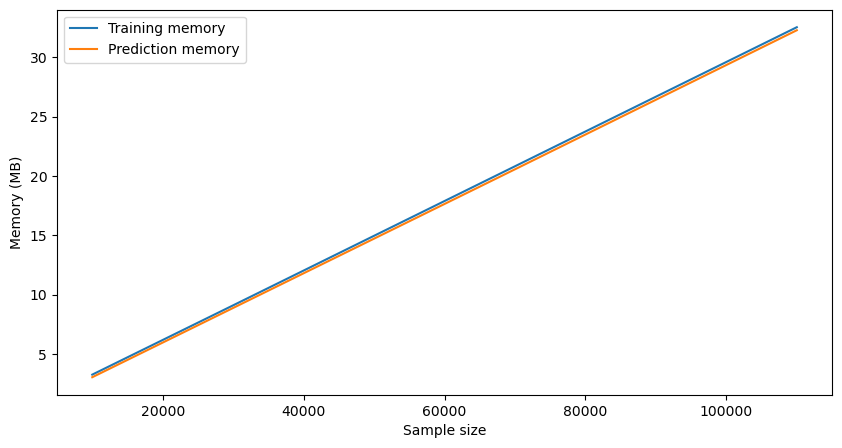

In [18]:
plot_mem_time()

The plots show that the training time is linear, but the prediction is constant.
For the memory plot, both training and prediction are linear.